<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/06-SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Máquinas de soporte vectorial
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de máquinas de soporte vectorial (SVM) para clasificar un conjunto de datos.

Los paquetes necesarios son:

In [32]:
# Paquetes necesarios
import pandas as pd  # Manejo de datos
import matplotlib.pyplot as plt  # Visualización

from sklearn.preprocessing import StandardScaler  # Estandarización de datos
from sklearn.datasets import make_blobs, make_circles # Creación de datos
from sklearn.model_selection import train_test_split # División de datos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Métrica de evaluación

# Algoritmo SVC
from sklearn.svm import SVC

---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase anterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [33]:
#Cargamos el conjunto de datos
data = pd.read_csv("https://raw.githubusercontent.com/SebastianJaramilloo/Tareas_Aprendizaje_Automatico-/refs/heads/main/data/players_21.csv")
print(data.head())

   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     200389  https://sofifa.com/player/200389/jan-oblak/210002   
3     188545  https://sofifa.com/player/188545/robert-lewand...   
4     190871  https://sofifa.com/player/190871/neymar-da-sil...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   33  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35  1985-02-05   
2           J. Oblak                            Jan Oblak   27  1993-01-07   
3     R. Lewandowski                   Robert Lewandowski   31  1988-08-21   
4          Neymar Jr        Neymar da Silva Santos Júnior   28  1992-02-05   

   height_cm  weight_kg nationality            club_name  ...   lwb   ldm  \
0        170         72   Argentina         FC Barc

In [34]:
#Descripcion de los datos
print(data.describe())

           sofifa_id           age     height_cm     weight_kg   league_rank  \
count   18944.000000  18944.000000  18944.000000  18944.000000  18719.000000   
mean   226242.402872     25.225823    181.190773     75.016892      1.357070   
std     27171.091056      4.697354      6.825672      7.057140      0.739327   
min        41.000000     16.000000    155.000000     50.000000      1.000000   
25%    210030.500000     21.000000    176.000000     70.000000      1.000000   
50%    232314.500000     25.000000    181.000000     75.000000      1.000000   
75%    246760.250000     29.000000    186.000000     80.000000      1.000000   
max    258970.000000     53.000000    206.000000    110.000000      4.000000   

            overall     potential     value_eur       wage_eur  \
count  18944.000000  18944.000000  1.894400e+04   18944.000000   
mean      65.677787     71.086729  2.224813e+06    8675.852513   
std        7.002278      6.109985  5.102486e+06   19654.774894   
min       47.00

In [35]:
#Seleccionamos las variables
numeric_cols = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
class_col = 'team_position'
data = data[numeric_cols + [class_col]]
data = data.dropna(subset=[class_col])

In [36]:
data = data.dropna()

In [37]:
#Escalamos los datos
scaler = StandardScaler()
X = scaler.fit_transform(data[numeric_cols])
y = data[class_col]


### <font color='264CC7'> Determinación del mejor kernel </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el mejor kernel para el modelo SVM.
<ul>
  <li>Genera una gráfica que muestre la precisión de los modelos con diferentes kernels.</li>
  <li>Selecciona el mejor kernel.</li>
</ul>
</div>


In [38]:
#Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [39]:
#Probamos Kernels
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
precisions_test = []

In [40]:
#Entrenamos y evaluamos
for kernel in kernel_values:
    modelo = SVC(kernel=kernel)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    precisions_test.append(accuracy_score(y_test, y_pred))

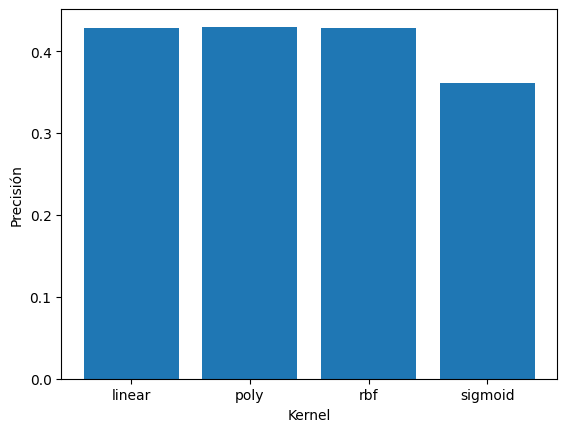

In [41]:
#Grafica de presicion
plt.bar(kernel_values, precisions_test)
plt.xlabel("Kernel")
plt.ylabel("Precisión")
plt.show()

In [42]:
mejor_kernel = kernel_values[precisions_test.index(max(precisions_test))]
print("Mejor kernel:", mejor_kernel)

Mejor kernel: poly


Los kernels linear, poly y rbf tienen prácticamente la misma precisión, alrededor de 0.43. Esto significa que los tres modelos se comportan muy parecido para este conjunto de datos y no hay una ventaja clara entre ellos.


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el kernel seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

In [48]:
#Entrenamiento del modelo
modelo = SVC(kernel='rbf')
modelo.fit(X_train, y_train)

SVC()

In [49]:
y_pred = modelo.predict(X_test)

In [50]:
#Precision
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 0.4283143371325735


In [51]:
#Matriz de confusion
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   57]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   26]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   36]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    2]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   15]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    5]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0 

In [52]:
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Reporte de clasificación:
              precision    recall  f1-score   support

         CAM       0.00      0.00      0.00        57
          CB       0.00      0.00      0.00        26
         CDM       0.00      0.00      0.00        36
          CF       0.00      0.00      0.00         2
          CM       0.00      0.00      0.00        15
         LAM       0.00      0.00      0.00         5
          LB       0.00      0.00      0.00       111
         LCB       0.00      0.00      0.00       136
         LCM       0.00      0.00      0.00        85
         LDM       0.00      0.00      0.00        50
          LF       0.00      0.00      0.00         2
          LM       0.00      0.00      0.00        84
          LS       0.00      0.00      0.00        45
          LW       0.00      0.00      0.00        34
         LWB       0.00      0.00      0.00        16
         RAM       0.00      0.00      0.00         5
          RB       0.00      0.00      0.00       111
 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


La matriz de confusión aparece con muchas filas y columnas porque la variable team_position tiene demasiadas clases distintas. Esto hace que el modelo tenga que predecir entre muchas categorías, y la matriz se vuelve grande y con muchos valores en cero. Por eso no es una representación muy útil para interpretar el desempeño del modelo en este caso.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Compara el modelo con otros algoritmos de clasificación vistos en clases anteriores.
</div>

# **Modelo KNN**

In [54]:
from sklearn.neighbors import KNeighborsClassifier
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train, y_train)
y_pred_knn = modelo_knn.predict(X_test)
print("Precisión KNN:", accuracy_score(y_test, y_pred_knn))

Precisión KNN: 0.32783443311337734


# **Regresion Logistica**

In [55]:
from sklearn.linear_model import LogisticRegression
modelo_lr = LogisticRegression(max_iter=500)
modelo_lr.fit(X_train, y_train)
y_pred_lr = modelo_lr.predict(X_test)
print("Precisión Regresión Logística:", accuracy_score(y_test, y_pred_lr))

Precisión Regresión Logística: 0.4337132573485303


la regresión logística fue la que mejor funcionó con una precisión de 0.43, luego viene el SVM que quedó muy parecido, y el que peor anduvo fue el kNN con 0.32. Se nota que los modelos más simples (como la regresión logística) se ajustaron mejor a estos datos, mientras que kNN no logró separar bien las clases. Al final, ninguno tiene una precisión muy alta, pero dentro de lo que probamos, la regresión logística fue la que dio el mejor resultado.